# Risk and Models

![](images/somedata.png)

Here is some data. We would like to learn which function $f(x)$ **generated** this data..

What does it mean to say: *generated this data*? It does not mean that the data came directly from the function, but rather, that the function, corresponding to some physical, social, or other process, along with some noise gave rise to this data.

We do not know what this function $f$ is. The best we can do is to find some other function $g$, the **fits this data best**, for some meaning of "best".

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

## The Hypothesis or Model Space

Such a function, one that we use to fit the data, is called a **hypothesis**. We'll use the notation $h$ to denote a hypothesis. 

Lets consider as hypotheses for some data, a particular class of functions called polynomials. 

A polynomial is a function that combines multiple powers of x linearly.  You've probably seen these in school, when working with quadratic or cubic equations and functions:

$$
\begin{align*}
h_1(x) &=& 9x - 7 && \,(straight\, line) \\
h_2(x) &=& 4x^2 + 3x + 2 && \,(quadratic) \\
h_3(x) &=& 5x^3 - 31x^2 + 3x  && \,(cubic).
\end{align*}
$$

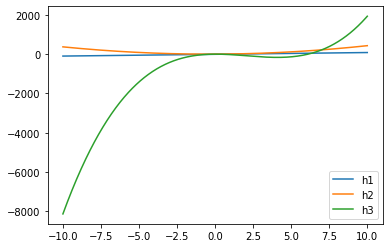

In [32]:
h1 = lambda x: 9*x - 7
h2 = lambda x: 4*x**2 +3*x + 2
h3 = lambda x: 5*x**3 -31*x**2 + 3*x
xgrid_lots = np.linspace(-10,10, 1000)
plt.plot(xgrid, h1(xgrid_lots), label="h1")
plt.plot(xgrid, h2(xgrid_lots), label="h2")
plt.plot(xgrid, h3(xgrid_lots), label="h3")
plt.legend();

In general, a polynomial can be written thus:

$$
\begin{eqnarray*}
 h(x) &=& a_0 + a_1 x^1 + a_2 x^2 + ... + a_n x^n \\
      &=& \sum_{i=0}^{n} a_i x^i
\end{eqnarray*}
$$

Thus, by linearly we mean a sum of coefficients $a_i$ times powers of $x$, $x^i$. In other words, the polynomial is **linear in its coefficients**.

Let us consider as the function we used to fit the data, a hypothesis $h$ that is a straight line. We put the subscript $1$ on the $h$ to indicate that we are fitting the data with a polynomial of order 1, or a straight line. This looks like:

$$ h_1(x) = a_0 + a_1 x $$

We'll call the **best fit** straight line the function $g_1(x)$. The "best fit" idea is this: amongst the set of all lines (i.e., all possible choices of $h_1(x)$), what is the best line $g_1(x)$ that represents the in-sample data we have? (The subscript $1$ on $g$ is chosen to indicate the best fit polynomial of degree 1, ie the line amongst lines that fits the data best).


## Error or Risk: How to learn the best fit model in a hypothesis space

Let's understand in an intuitive sense, what it means for a function to be a good fit to the data. Lets consider, for now, only the hypothesis space $\cal{H}_{1}$, the set of all straight lines. In the figure below, we draw against the data points (in red) one such line $h_1(x)$ (in red). We're just trying to find the best function to go through the data, with the function being chosen amongst many in a hypothesis space.

![m:Cost](./images/linreg.png)

The natural way of thinking about a "best fit" would be to minimize the distance from the line to the points, for some notion of distance. In the diagram we depict one such notion of distance: the vertical distance from the points to the line. These distances are represented as thin black lines.

The next question that then arises is this: how exactly we define the measure of this vertical distance? We cant take the measure of distance to be the y-value of the point minus the y value of the line at the same x, ie $y_i - h_1(x_i)$. Why? If we did this, then we could have points very far from the line, and as long as the total distance above was equal to the total distance below the line, we'd get a net distance of 0 even when the line is very far from the points.

Thus we must use a positive estimate of the distance as our measure. We could take either the absolute value of the distance, $\vert y_i - h_1(x_i) \vert$, or the square of the distance as our measure, $(y_i - h_1(x_i))^2$. Both are reasonable choices, and we shall use the squared distance for now. (Now its probably clear to you why we defined bias in the last section as the pointwise square of the distance).

We sum this measure up over all our data points, to create whats known as the **error functional** or **risk functional** (also just called **error**, **cost**, or **risk**) of using line $h_1(x)$ to fit our points $y_i \in \cal{D}$ (this notation is to be read as "$y_i$ in $\cal{D}$") :

$$ R_{\cal{D}}(h_i(x)) = \frac{1}{N} \sum_{y_i \in \cal{D}} (y_i - h_1(x_i))^2 $$

where $N$ is the number of points in $\cal{D}$.

What this formula says is: the cost or risk is just the total squared distance to the line from the observation points. Here we use the word **functional** to denote that, just as in functional programming, the risk is a *function of the function* $h_1(x)$. 

We also make explicit the in-sample data $\cal{D}$, because the value of the risk depends upon the points at which we made our observation. If we had made these observations $y_i$ at a different set of $x_i$, the value of the risk would be somewhat different. 

Now, given these observations, and the hypothesis space $\cal{H}_1$, we minimize the risk over all possible functions in the hypothesis space to find the **best fit** function $g_1(x)$:

$$ g_1(x) = \arg\min_{h_1(x) \in \cal{H}} R_{\cal{D}}(h_1(x)).$$

Here the notation 

$"\arg\min_{x} F(x)"$ 

means: give me the argument of the functional $x$ at which $F(x)$ is minmized. So, for us: give me the function $g_1(x) = h_1$ at which the risk $R_{\cal{D}}(h_1)$ is minimized; i.e. the minimization is over *functions* $h_1$.

Thus we can in general write:

$$ g(x) = \arg\min_{h(x) \in \cal{H}} R_{\cal{D}}(h(x)),$$

where $\cal{H}$ is a general hypothesis space of functions.

## The target function and the generation of data

Where did the data come from? The simple answer is that you measured some data using an instrument. But if we dig deeper, we want to ask the question: how was the data generated? Perhaps there was some function, unknown to us, which generated this data.

Lets call this target function $f$. For example:

$$f(x) = sin(\pi x)$$

Now We'll say that the data points come from the generating model $f(x)$ when:

$$y = f(x) + \epsilon$$

where $\epsilon$ is **noise**.

Lets say we have as our $x$ data some uniformly spaced poins between -1 and 1. Then:

In [34]:
xgrid = xs=np.arange(-1.,1.,0.02)
print(xgrid.shape)
f = lambda x: np.sin(np.pi*x)
fgrid = f(xgrid)

In [83]:
ynoise = fgrid + 0.1*np.random.normal(size=100)

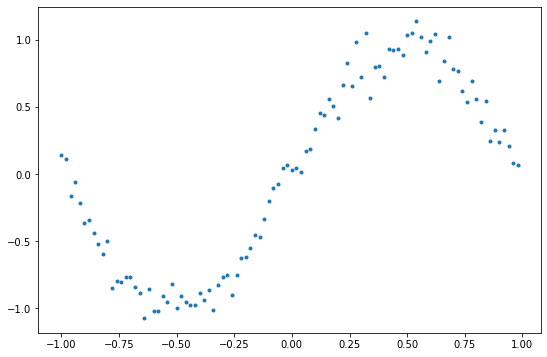

In [84]:
plt.figure(figsize = (9, 6))
plt.plot(xgrid, ynoise, '.');

**Approximation** is when there is no noise. Thus $\epsilon = 0$. Then:

$$y = f(x)$$

In [85]:
ynonoise = fgrid

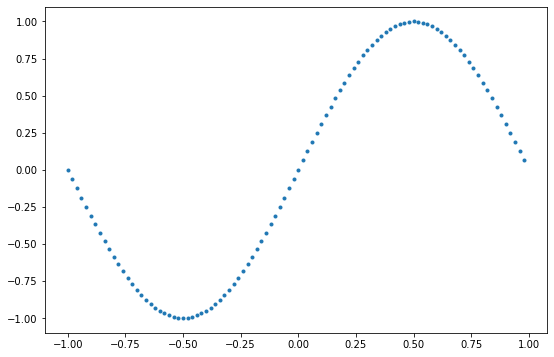

In [86]:
plt.figure(figsize = (9, 6))
plt.plot(xgrid, ynonoise, '.');

We'll call such points $(x_1,y_1), (x_2,y_2), ..., (x_n,y_n)$ a **population** of N points that make up our **data**. In life you are usually not so lucky to get a population. For example, to do a pre-election poll in a state, you might ask a **sample** of 1000 people for their choices, even though the voting population might be in the millions.

Here we have 100 data points along a sine curve.

Now our game is to figure out what this function $f$ is, based on probing all the functions $h$ in some hypothesis class ${\cal H}$. The best fit $h$ in this class, we will call $g$, or more usually in the literature $\hat{f}$, our estimate of $f$ on this **sample**.

We have a target function $f(x)$ that we do not know. But we do have a sample of M data points from it, $(x_1,y_1), (x_2,y_2), ..., (x_m,y_m)$. We call this the **sample** or **training examples** $\cal{D}$. We are interested in using this sample to estimate a function $g$ (or $\hat{f}$ to approximate the function $f$, and which can be used for prediction at new data points, or on the entire population 

This prediction on new data points, or the population, is also called **out-of-sample prediction**. 



## Fitting the Data

Lets see what it is like to fit the data. We will first fit on the population and then on the sample.

First, let us be clear, that the execise we will engage in here is **approximation**, since we will use the noiseless sine curve. (We have a sine curve that generates our data, and there is no additional "noise"). But somehow we dont remember anymore that we used the sine curve, and try to approximate it with simpler functions we know.

Notice the way that statistics comes into this approximation problem is from the notion that we are trying to reconstruct the original function from a small-ish sample rather than a large-ish population.

To do this, we use an algorithm, called the **learner**, which chooses functions from a hypothesis set $\cal{H}$ and computes a cost measure or risk functional $R$ (like the sum of the squared distance over all points in the data set) for each of these functions. It then chooses the function $g$ which **minimizes** this cost measure amonst all the functions in $\cal{H}$, and thus gives us a final hypothesis $g$ which we then use to approximate or estimate f **everywhere**, not just at the points in our data set. 

Here our learner is called **Polynomial Regression**, and it takes a hypothesis space $\cal{H}_d$ of degree $d$ polynomials, minimizes the "squared-error" risk measure, and spits out a best-fit hypothesis $g_d$.

![](images/BasicModel.png)

(This diagram is based on the one in Yaser Abu-Mustafa's excellent book, Learning From Data.)

In [35]:
from sklearn.linear_model import LinearRegression

We'll first fit on the population:

In [36]:
Xgrid = xgrid.reshape(-1,1)
learner = LinearRegression()
learner.fit(Xgrid, fgrid)
ggrid = learner.predict(Xgrid)

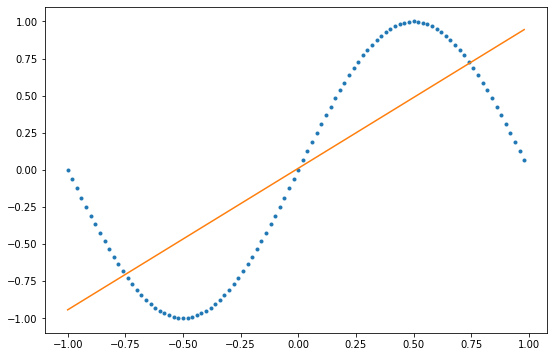

In [38]:
plt.figure(figsize = (9, 6))
plt.plot(xgrid, fgrid, '.')
plt.plot(xgrid, ggrid);

What happens if we only have a sample? Say we have a sample of 20 points:


In [47]:
sample_indices = np.random.choice(xgrid2.shape[0], replace=False, size=20)
xgrid_sample = xgrid2[sample_indices]
l = LinearRegression().fit(xgrid_sample.reshape(-1,1), fgrid[sample_indices])
gsample_grid = l.predict(Xgrid)

In [54]:
fgrid_sample = fgrid[sample_indices]

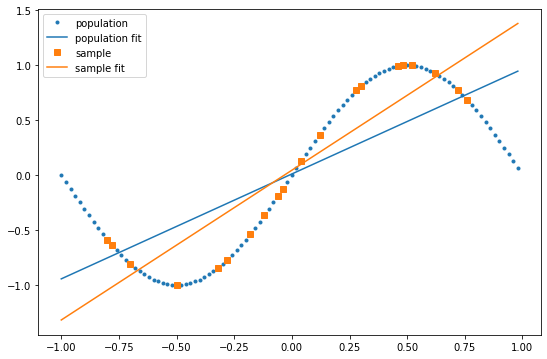

In [55]:
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize = (9, 6))
plt.plot(xgrid, fgrid, '.', c=colors[0], label="population")
plt.plot(xgrid, ggrid, c=colors[0], label="population fit");
plt.plot(xgrid_sample, fgrid_sample, 's', c=colors[1], label="sample")
plt.plot(xgrid, gsample_grid, c=colors[1], label="sample fit");
plt.legend();

This approximation is very bad to start with, but note that making the approximation on a sample does give is a different answer, but the general direction is not so hugely different.

We can try a 3rd order polynomial as well:

In [73]:
from sklearn.preprocessing import PolynomialFeatures
Xgrid_poly = PolynomialFeatures(3).fit_transform(Xgrid)
Xgrid_poly.shape

(100, 4)

In [74]:
ggrid_poly = LinearRegression(fit_intercept=False).fit(Xgrid_poly, fgrid).predict(Xgrid_poly)

In [75]:
Xgrid_poly_sample = PolynomialFeatures(3).fit_transform(
                        xgrid2[sample_indices].reshape(-1,1))
ggrid_poly_sample = LinearRegression().fit(Xgrid_poly_sample, fgrid_sample).predict(Xgrid_poly)

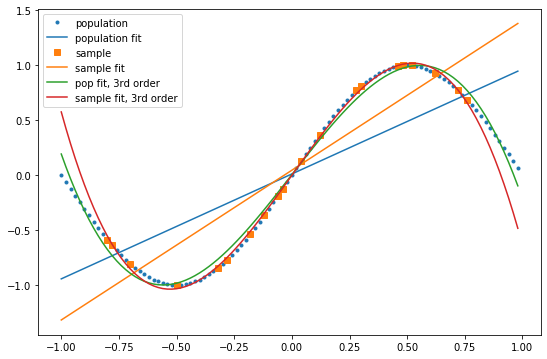

In [76]:
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize = (9, 6))
plt.plot(xgrid, fgrid, '.', c=colors[0], label="population")
plt.plot(xgrid, ggrid, c=colors[0], label="population fit");
plt.plot(xgrid_sample, fgrid[sample_indices], 's', c=colors[1], label="sample")
plt.plot(xgrid, gsample_grid, c=colors[1], label="sample fit");
plt.plot(xgrid, ggrid_poly,  c=colors[2], label="pop fit, 3rd order");
plt.plot(xgrid, ggrid_poly_sample,  c=colors[3], label="sample fit, 3rd order");
plt.legend();

Our more complex model is doing (visually) a better job!